In [165]:
#import libraries
import pandas as pd #pandas class
import numpy as np
import traceback
import os
import copy
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import category_encoders as ce
import time
from scipy.stats import chi2_contingency
from scipy.stats import boxcox
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import logging
plt.style.use('_mpl-gallery')

In [6]:
try:
        
        filepath=f"C:\\Custom\\Semester 2\\CA683 DADM\\Home Loan Approval System\\Cleaning_2.csv"
        df=pd.read_csv(filepath)
        df.drop(columns='Unnamed: 0',inplace=True)
        #take backup of file
        backup=copy.deepcopy(df)
        
except Exception as ex:
    print(f'Following exception:\n {ex}')
    traceback.print_exc()

In [10]:
def box(column):
    '''A shortcut to generate box plot of columns.'''
    sns.set(rc={'figure.figsize':(5.1,3.27)})
    sns.boxplot(y=df[column])
    
def hist(column,bins='auto'):
    '''A shortcut to generate historgram of columns.'''
    sns.set(rc={'figure.figsize':(7.7,3.27)})
    sns.histplot(data=df,x=df[column])

In [20]:
'''log transformation for continous predictor.'''

def box_log(column):
    '''A shortcut to generate box plot of columns.'''
    sns.set(rc={'figure.figsize':(5.1,3.27)})
    sns.boxplot(y=np.log(df[column]))
def hist_log(column,bins='auto'):
    '''A shortcut to generate historgram of columns.'''
    sns.set(rc={'figure.figsize':(7.7,3.27)})
    sns.histplot(data=df,x=np.log(df[column]))
    

In [28]:
'''Box-cox transformation for continous predictor.'''

def box_bcox(column):
    '''A shortcut to generate box plot of columns.'''
    x,_=boxcox(df[column])
    sns.set(rc={'figure.figsize':(5.1,3.27)})
    sns.boxplot(y=x)
def hist_bcox(column,bins='auto'):
    '''A shortcut to generate historgram of columns.'''
    x,_=boxcox(df[column])
    sns.set(rc={'figure.figsize':(7.7,3.27)})
    sns.histplot(x=x)
    

Enter exact column name (please copy and paste from your dataframe):
 AMT_CREDIT



Found the column.


Please select an appropriate option for your transformation and plot type
Option 1: Simple box plot
Option 2: Simple histogram
Option 3: Log transformed box plot
Option 4: Log transformed histogram
Option 5: BoxCox transformed box plot
Option 6: BoxCox transformed histogram plot



Your choice 3


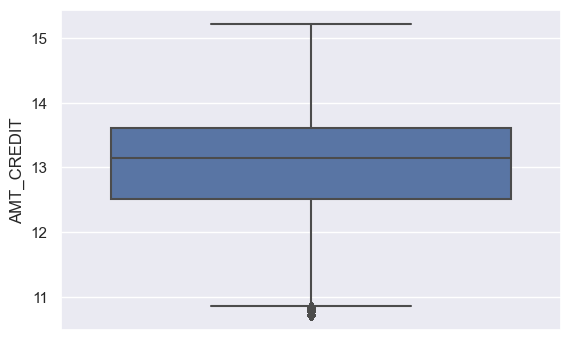

In [43]:
def show():
    '''This function is an api to automate the task of Data Transformation.'''
    
    count=0
    while True:
        
        column=input('Enter exact column name (please copy and paste from your dataframe):\n')
    
        if column in list(df.columns):
            print('\nFound the column.\n')
            
            print('\nPlease select an appropriate option for your transformation and plot type')
            print('Option 1: Simple box plot\nOption 2: Simple histogram\nOption 3: Log transformed box plot\nOption 4: Log transformed histogram\nOption 5: BoxCox transformed box plot\nOption 6: BoxCox transformed histogram plot\n')
            plot_type=input('Your choice')
            
            if plot_type==str(1):
                box(column)
            elif plot_type==str(2):
                hist(column)
            elif plot_type==str(3):
                box_log(column)
            elif plot_type==str(4):
                hist_log(column)
            elif plot_type==str(5):
                box_bcox(column)
            elif plot_type==str(6):
                hist_bcox(column)
            else:
                print('Poor Choice')
            break
        else:
            count+=1
            if count>3: 
                print('Incorrect column name.')
                print('Aborting the program.')
                break
            else:
                print('Try again!')

show()

Enter exact column name (please copy and paste from your dataframe):
 AMT_INCOME_TOTAL



Found the column.


Please select an appropriate option for your transformation and plot type
Option 1: Simple box plot
Option 2: Simple histogram
Option 3: Log transformed box plot
Option 4: Log transformed histogram
Option 5: BoxCox transformed box plot
Option 6: BoxCox transformed histogram plot



Your choice 6


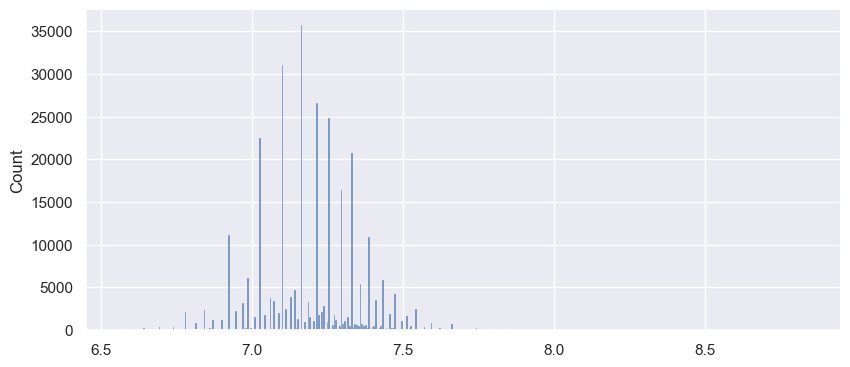

In [88]:
show()

In [101]:
'''There are two columns 'AMT_CREDIT', 'AMT_ANNUITY' for which we will perform log transformation and for column 'AMT_INCOME_TOTAL' 
boxcox transfromation will be used. These transformation will give us close to normal distribution.
'''

df['AMT_INCOME_TOTAL'],_=boxcox(df['AMT_INCOME_TOTAL'])
df['AMT_CREDIT']=np.log(df['AMT_CREDIT'])
df['AMT_ANNUITY']=np.log(df['AMT_ANNUITY'])

In [105]:
'''For our analysis, we will also transform the columns 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
    'DAYS_LAST_PHONE_CHANGE' to positive columns.
'''

#columns DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE has only negative values so easy sign transformation.
df['DAYS_LAST_PHONE_CHANGE']=df['DAYS_LAST_PHONE_CHANGE']*-1
df['DAYS_BIRTH']=df['DAYS_BIRTH']*-1
df['DAYS_ID_PUBLISH']=df['DAYS_ID_PUBLISH']*-1
df['DAYS_REGISTRATION']=df['DAYS_REGISTRATION']*-1


#for column DAYS_EMPLOYED has both negative and positive values, for which we'll create a new feature DAYS_UNEMPLOYED to move the 
#negative values.
df['DAYS_UNEMPLOYED']=df['DAYS_EMPLOYED']

#column where day employed is negative turned to zero.
df.loc[df['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED']=0

#column where days unemployed is positive turned to zero
df.loc[df['DAYS_UNEMPLOYED']>0,'DAYS_UNEMPLOYED']=0

#finally column wehre day unemployed is negative turned +ve
df['DAYS_UNEMPLOYED']=df['DAYS_UNEMPLOYED']*-1

In [136]:
#both 'DAYS_EMPLOYED' and 'DAYS_UNEMPLOYED' have very large number of outliers.
df['DAYS_EMPLOYED'].describe() 
df['DAYS_UNEMPLOYED'].describe() 

In [195]:
backup=copy.deepcopy(df)

In [196]:
'''Normalise continous features.
    Some of our continous predictors are already Min-Max normalised so we'll use the same technique
'''

def min_max_normalisation(column):
    '''Calculate min max normalisation of a given continous predictor.'''
    min_va=np.min(df[column])
    max_va=np.max(df[column])
    
    range_val=max_va-min_va
    
    new_col=(df[column]-min_va)/range_val
    df[column]=new_col


collist=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',\
        'OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE','DAYS_UNEMPLOYED']
for column in collist:
    min_max_normalisation(column)

In [211]:
df.shape

(307511, 158)

In [212]:
backup=copy.deepcopy(df)

In [ ]:
def backup(df,Uid):
        filepath=f"C:\Custom\Semester 2\CA683 DADM\Home Loan Approval System\Cleaning_{Uid}.csv"
        print(f'Backup file: {filepath}')
        df.to_csv(filepath)
        print(f'File created.')
backup(df,3)